In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import warnings
warnings.filterwarnings('ignore')


plt.style.use("fivethirtyeight")
%matplotlib inline

pd.set_option('display.max_columns', 30)

In [4]:
df = pd.read_csv('/content/amazon.csv')

In [ ]:
df.shape

(1465, 16)

In [ ]:
df.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


In [ ]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [6]:
df.dtypes

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object

In [7]:
df.category.unique()

array(['Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables',
       'Computers&Accessories|NetworkingDevices|NetworkAdapters|WirelessUSBAdapters',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables',
       'Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions',
       'Electronics|HomeTheater,TV&Video|Accessories|RemoteControls',
       'Electronics|HomeTheater,TV&Video|Televisions|StandardTelevisions',
       'Electronics|HomeTheater,TV&Video|Accessories|TVMounts,Stands&Turntables|TVWall&CeilingMounts',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|RCACables',
       'Electronics|HomeAudio|Accessories|SpeakerAccessories|Mounts',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|OpticalCables',
       'Electronics|HomeTheater,TV&Video|Projectors',
       'Electronics|HomeAudio|Accessories|Adapters',
       'Electronics|HomeTheater,TV&Video|SatelliteEquipment|SatelliteReceivers',
       'Computers&Acces

In [8]:
df.rating.unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '|', '2', '3', '2.6', '2.9'],
      dtype=object)

In [11]:
df.rating.replace(to_replace= '|', value =pd.NA, inplace = True)

In [13]:
df['rating'].astype(float).mean()

TypeError: float() argument must be a string or a real number, not 'NAType'

In [15]:
df['rating'] = pd.to_numeric(df['rating'], errors = 'coerce')

In [16]:
df['rating'].mean()

4.096584699453552

In [17]:
average_category_rating = df.groupby('category')['rating'].mean()

In [18]:
average_category_rating

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSu

In [22]:
df.shape

(1465, 16)

In [23]:
df.describe()

,rating
count,1464.000000
mean,4.096585
std,0.291674
min,2.000000
25%,4.000000
50%,4.100000
75%,4.300000
max,5.000000


In [24]:
df.rating.values

array([4.2, 4. , 3.9, ..., 3.6, 4. , 4.3])

In [27]:
# df['rating'] = df['rating'].replace(to_replace = '|', value = pd.NA, inplace = True)

In [ ]:
# df['rating'] = pd.to_numeric(df['rating'], errors= 'coerce')

In [28]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [45]:
df['rating_count'].unique()

array([nan])

In [46]:
df['rating_count'] = df['rating_count'].replace(to_replace = '', value = ',', inplace = True)
df['rating_count'] = df['rating_count'].astype(float)
df['rating_count'].dtype


df['rating_count'].values

array([nan, nan, nan, ..., nan, nan, nan])

In [42]:
tope_rated_by_category = df.groupby('category')['rating_count'].nlargest(5)

In [43]:
tope_rated_by_category

category                                                                                                                    
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                  1157   NaN
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                 695    NaN
                                                                                                                        742    NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                         906    NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                      748    NaN
                                                                                                                                ..
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Ref

In [47]:
df_one = pd.read_csv('/content/amazon.csv')

In [49]:
df_one.rating_count.values

array(['24,269', '43,994', '7,928', ..., '468', '8,031', '6,987'],
      dtype=object)

In [50]:
df_one['rating_count'] = df['rating_count'].replace(to_replace = {"'" :"", ",":""}, inplace = True)

In [51]:
df_one['rating_count'].values

array([None, None, None, ..., None, None, None], dtype=object)

In [52]:
df_two = pd.read_csv('/content/amazon.csv')

In [53]:
df_two['rating_count'] = df_two['rating_count'].str.replace(',', '').str.replace("'", '')

In [54]:
df_two['rating_count'].values

array(['24269', '43994', '7928', ..., '468', '8031', '6987'], dtype=object)

In [55]:
df_two['rating_count'] = df_two['rating_count'].astype(float)

In [62]:
top_rated_category = df_two.groupby('category')['rating_count'].nlargest(2).reset_index(level =0)

In [63]:
top_rated_category

,category,rating_count
1157,Car&Motorbike|CarAccessories|InteriorAccessori...,1118.0
695,Computers&Accessories|Accessories&Peripherals|...,4426.0
742,Computers&Accessories|Accessories&Peripherals|...,1540.0
906,Computers&Accessories|Accessories&Peripherals|...,7222.0
748,Computers&Accessories|Accessories&Peripherals|...,14969.0
...,...,...
765,OfficeProducts|OfficePaperProducts|Paper|Stati...,5719.0
858,OfficeProducts|OfficePaperProducts|Paper|Stati...,2450.0
850,OfficeProducts|OfficePaperProducts|Paper|Stati...,4308.0
919,OfficeProducts|OfficePaperProducts|Paper|Stati...,3686.0


In [64]:
df_two.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [65]:
df_two['discounted_price'].unique()

array(['₹399', '₹199', '₹329', '₹154', '₹149', '₹176.63', '₹229', '₹499',
       '₹299', '₹219', '₹350', '₹159', '₹349', '₹13,999', '₹249',
       '₹13,490', '₹970', '₹279', '₹59', '₹11,499', '₹14,999', '₹179',
       '₹389', '₹599', '₹99', '₹899', '₹32,999', '₹209', '₹19,999',
       '₹999', '₹333', '₹507', '₹309', '₹1,199', '₹799', '₹6,999', '₹230',
       '₹649', '₹15,999', '₹348', '₹32,990', '₹139', '₹263', '₹7,999',
       '₹1,599', '₹26,999', '₹115', '₹10,901', '₹1,434', '₹7,299', '₹325',
       '₹29,999', '₹27,999', '₹30,990', '₹269', '₹24,999', '₹18,990',
       '₹290', '₹345', '₹1,099', '₹719', '₹849', '₹21,999', '₹449',
       '₹37,999', '₹7,390', '₹273.10', '₹15,990', '₹210', '₹1,299',
       '₹347', '₹228', '₹1,499', '₹8,499', '₹20,990', '₹9,999', '₹489',
       '₹23,999', '₹689', '₹1,699', '₹655', '₹749', '₹195', '₹416',
       '₹368', '₹29,990', '₹339', '₹15,490', '₹9,490', '₹637', '₹1,089',
       '₹12,499', '₹1,399', '₹88', '₹57.89', '₹205', '₹949', '₹379',
       '₹8,9

In [68]:
df_two['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace("'",'').str.replace(',','')

In [69]:
df_two['discounted_price'] = df_two['discounted_price'].astype(float)

In [70]:
df_two['actual_price'].unique()

array(['₹1,099', '₹349', '₹1,899', '₹699', '₹399', '₹1,000', '₹499',
       '₹299', '₹999', '₹339', '₹799', '₹700', '₹899', '₹24,999',
       '₹21,990', '₹1,799', '₹22,900', '₹199', '₹19,990', '₹19,999',
       '₹1,999', '₹750', '₹599', '₹666.66', '₹1,900', '₹45,999', '₹695',
       '₹34,999', '₹1,599', '₹1,208', '₹475', '₹395', '₹2,199', '₹500',
       '₹2,100', '₹12,999', '₹1,399', '₹21,999', '₹1,499', '₹47,900',
       '₹845', '₹1,400', '₹14,990', '₹2,999', '₹42,999', '₹30,990',
       '₹3,999', '₹249', '₹19,125', '₹1,299', '₹39,999', '₹40,990',
       '₹52,900', '₹800', '₹31,999', '₹1,809', '₹29,999', '₹65,000',
       '₹20,000', '₹23,990', '₹15,999', '₹44,990', '₹44,999', '₹1,700',
       '₹595', '₹27,990', '₹1,200', '₹34,990', '₹1,500', '₹49,990',
       '₹931', '₹2,399', '₹1,339', '₹20,900', '₹15,990', '₹1,600', '₹849',
       '₹1,199', '₹22,990', '₹2,499', '₹47,990', '₹485', '₹18,990',
       '₹11,000', '₹70,900', '₹549', '₹35,999', '₹1,699', '₹31,990',
       '₹9,990', '₹16,99

In [71]:
df_two['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace("'",'').str.replace(',','')

In [72]:
df_two['actual_price'] = df_two['actual_price'].astype(float)

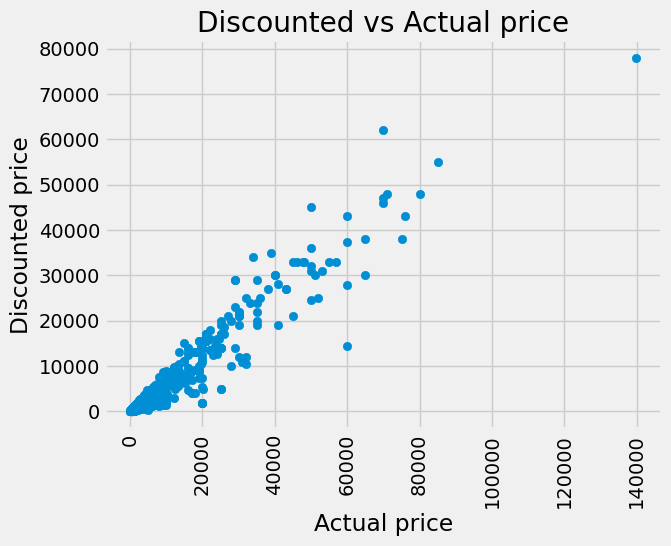

In [75]:
plt.scatter(df_two['actual_price'],df_two['discounted_price'] )
plt.xlabel('Actual price')
plt.ylabel('Discounted price')
plt.xticks(rotation=90)
plt.title('Discounted vs Actual price')
plt.show()

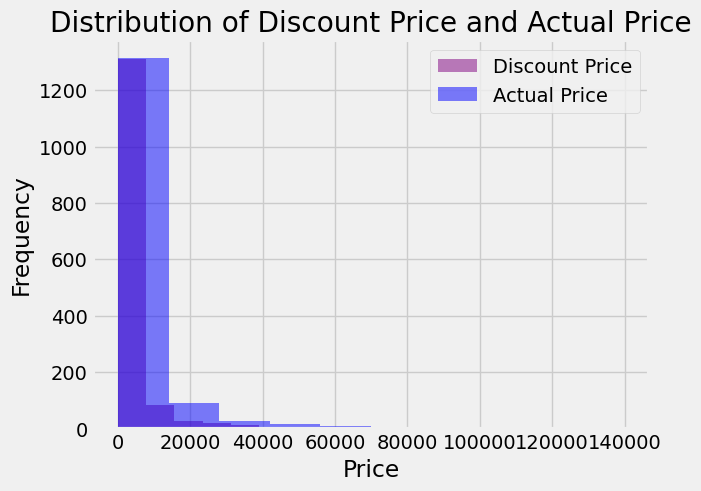

In [80]:
plt.hist(df_two['discounted_price'], alpha=0.5, label='Discount Price', color = 'purple')
plt.hist(df_two['actual_price'], alpha=0.5, label='Actual Price', color ='blue')

# Set labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Discount Price and Actual Price')

# Add legend
plt.legend()

# Display the plot
plt.show()

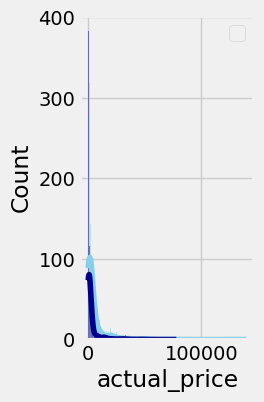

In [87]:
plt.figure(figsize =(2,4))
sns.histplot(df_two['actual_price'],alpha = 0.5, kde= True, color ='skyblue')
sns.histplot(df_two['discounted_price'], alpha =0.5, kde = True, color ='darkblue')
plt.legend()
plt.show()

In [88]:
df_two.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [103]:
df_two['discount_percentage'].unique()

array([nan])

In [98]:
df_two['discount_percentage'] =df_two['discount_percentage'].str.replace('%', '', "'",'')

In [99]:
df_two['discount_percentage'] =df_two['discount_percentage'].astype(float)

In [100]:
average_discount_percentage = df_two.groupby('category')['discount_percentage'].mean()

In [101]:
average_discount_percentage

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                   NaN
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                  NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                          NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                       NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                          NaN
                                                                                                                          ..
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens       NaN
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPen

In [102]:
df_two['discount_percentage'].values

array([nan, nan, nan, ..., nan, nan, nan])

In [5]:
df_three = pd.read_csv('/content/sample_data/amazon.csv')

In [105]:
df_three['discount_percentage'] = df_three['discount_percentage'].str.replace('%', '').str.replace("'", '')

In [106]:
df_three['discount_percentage'] = df_three['discount_percentage'].astype(float)

In [108]:
price_avergae = df_three.groupby('category')['discount_percentage'].mean()

In [110]:
print(price_avergae)

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    42.0
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   78.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           35.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        56.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           46.5
                                                                                                                          ... 
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens         0.0
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidIn

In [112]:
df_three.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [113]:
df_three['rating_count'] = df_three['rating_count'].str.replace(',', '').str.replace("'", '')

In [114]:
df_three['rating_count']  = df_three['rating_count'].astype(float)

In [122]:
df_three.product_name.value_counts().index[0]

'Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution'

TypeError: Series.sort_values() takes 1 positional argument but 2 positional arguments (and 1 keyword-only argument) were given

In [6]:
df_three.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [8]:
selected_columns= ['discounted_price', 'rating']
df_three[selected_columns].corr()

ValueError: could not convert string to float: '₹399'

In [19]:
df_rating.discounted_price.unique()
df_rating.discounted_price =df_rating.discounted_price.str.replace('₹', '').str.replace(',','').str.replace("'",'')
df_rating.discounted_price.astype(float)

0        399.0
1        199.0
2        199.0
3        329.0
4        154.0
         ...  
1460     379.0
1461    2280.0
1462    2219.0
1463    1399.0
1464    2863.0
Name: discounted_price, Length: 1465, dtype: float64

In [13]:
df_three.rating.unique()
df_three.rating =df_three.rating.replace(to_replace={"|": ''}, inplace =True)
df_three.rating.astype(float)

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1460   NaN
1461   NaN
1462   NaN
1463   NaN
1464   NaN
Name: rating, Length: 1465, dtype: float64

In [28]:
df_rating1 = pd.read_csv('/content/sample_data/amazon.csv')
df_rating2 = pd.read_csv('/content/sample_data/amazon.csv')

In [34]:
# df_rating1.rating = df_rating1.rating.replace(to_replace = '|', value =pd.NA, inplace=True)
# df.rating.replace(to_replace= '|', value =pd.NA, inplace = True)
# df_rating2.rating = df_rating2.rating.str.replace('|','')
# df_rating2.rating = pd.to_numeric(df_rating2.rating, errors='coerce')
df_rating2.rating.values

array([4.2, 4. , 3.9, ..., 3.6, 4. , 4.3])

In [18]:
df_rating.rating = pd.to_numeric(df_rating.rating, errors ='coerce')

In [ ]:
selected_columns= ['discounted_price', 'rating']
df_rating[selected_columns].corr()

In [35]:
df_rating2.discounted_price.unique()
df_rating2.discounted_price =df_rating2.discounted_price.str.replace('₹', '').str.replace(',','').str.replace("'",'')
df_rating2.discounted_price.astype(float)

0        399.0
1        199.0
2        199.0
3        329.0
4        154.0
         ...  
1460     379.0
1461    2280.0
1462    2219.0
1463    1399.0
1464    2863.0
Name: discounted_price, Length: 1465, dtype: float64

In [36]:
selected_columns= ['discounted_price', 'rating']
df_rating2[selected_columns].corr()

,discounted_price,rating
discounted_price,1.000000,0.120337
rating,0.120337,1.000000


<Axes: >

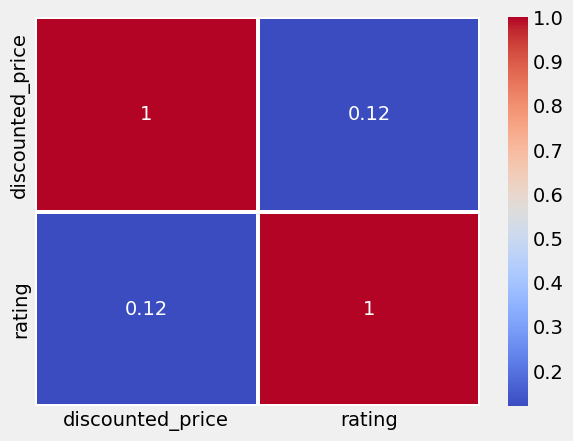

In [41]:
sns.heatmap(df_rating2[selected_columns].corr(), annot =True, cmap = 'coolwarm', linewidth = 1.5)

In [43]:
df_rating2.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')